In [ ]:
'''
Author: chuanjun
Date: 2023-05-25 14:00:25
LastEditTime: 2023-05-27 06:25:16
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [ ]:
df1=pd.read_excel('RESSET_MRESSTK_1.xlsx')
df2=pd.read_excel('RESSET_MRESSTK_2.xlsx')
df3=pd.read_excel('RESSET_MRESSTK_3.xlsx')
df4=pd.read_excel('RESSET_MRESSTK_4.xlsx')
df5=pd.read_excel('RESSET_MRESSTK_5.xlsx')
df6=pd.read_excel('RESSET_MRESSTK_6.xlsx')

df=pd.concat([df1,df2,df3,df4,df5,df6],axis=0)
df.head()

In [ ]:
#将df导出为csv文件
df.to_csv('RESSET_NEW_new.csv',index=False,encoding='utf-8-sig')

# 数据预处理
数据来源：RESSET(www.resset.com)

（1）剔除退市风险警告
（Special Treatment，ST 和*ST）类型样本；（2）由于金融行业公司财报于其他行
业公司财报具有较大差异性，剔除金融业上市公司，即证监会2012 年行业分类中
的J 类股票；（3）剔除上市不满一年的股票，这是因为后文计算CGO 时需要过去
52 周即1 年的交易数据；（4）Liu 等(2019)认为，中国股市中市值排名后30%的
上市公司会受到壳价值污染的严重影响，因此本文将每个月末市值规模排在后30%
的股票剔除

In [ ]:
df=pd.read_csv('RESSET_NEW_new.csv',encoding='utf-8-sig')
df.info()

In [ ]:
df.describe()

中国股市中市值排名后30%的上市公司会受到壳价值污染的严重影响，因此本文将每个月末市值规模排在后30%的股票剔除

In [ ]:
# 计算市值
df['市值'] = df['流通股_Trdshr'] * df['收盘价_ClPr']
# 计算每个股票的市值均值
mean_dict = df.groupby('最新股票名称_Lstknm')['市值'].mean().to_dict()

#对mean_dict排序
mean_dict = sorted(mean_dict.items(), key=lambda x: x[1], reverse=True)

#得到mean_dict排名最后的30%的股票名称
last_30 = [i[0] for i in mean_dict[-int(len(mean_dict)*0.3):]]
#对应last_30删除df中的股票名称所在列
df = df[~df['最新股票名称_Lstknm'].isin(last_30)]


In [ ]:
#将df导出为csv文件
df.to_csv('RESSET_cleaned_new.csv', index=False, encoding='utf-8-sig')

数据处理后的数据为RESSET_cleaned_new.csv，在接下来的计算中使用该数据。股票数一共为3035，时间跨度为1997年1月到2023年3月，共计315个月。

# 异象变量计算

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#中文显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


In [148]:
data=pd.read_csv('RESSET_cleaned_new.csv',encoding='utf-8-sig')
#将日期_Date只保留年月
data['日期_Date']=data['日期_Date'].apply(lambda x:x[:7])
data.head()


,最新股票名称_Lstknm,日期_Date,收盘价_ClPr,复权价1(元)_AdjClpr1,复权价2(元)_AdjClpr2,成交量_Trdvol,成交金额_Trdsum,总股数月换手率(%)_MonFulTurnR,流通股月换手率(%)_MonTrdTurnR,总股数平均日换手率(%)_AvgDFulTurnR,...,市销率_PS,每股收益(摊薄)(元/股)_EPS,净资产收益率(摊薄)_ROE,每股公积金(元/股)_AccumFundPS,每股营业利润(元/股)_OpPrfPS,每股净资产(元/股)_NAPS,调整后每股净资产(元/股)_NAPSadj,每股营业收入(元/股)_IncomePS,每股经营活动现金流量净额(元/股)_NCFfropePS,市值
0,万科A,1997-01,11.20,44.5573,0.3323,68823654.0,7.349675e+08,27.9416,40.1766,1.2701,...,2.21,0.19,4.3326,3.62,0.77,4.29,NaN,6.11,NaN,1.918590e+09
1,万科A,1997-02,11.18,44.4777,0.3317,42408777.0,4.509022e+08,17.2175,24.7566,1.7217,...,2.21,0.19,4.3326,3.62,0.77,4.29,NaN,6.11,NaN,1.915164e+09
2,万科A,1997-03,14.37,57.1686,0.4264,150672233.0,1.927915e+09,61.1711,87.9567,3.0586,...,2.21,0.19,4.3326,3.62,0.77,4.29,NaN,6.11,NaN,2.461620e+09
3,万科A,1997-04,20.28,80.6805,0.6017,241368647.0,4.115419e+09,97.9928,140.9018,4.4542,...,2.21,0.47,11.2256,3.76,0.73,4.21,NaN,4.78,NaN,3.474019e+09
4,万科A,1997-05,17.97,71.4906,0.5332,164431960.0,3.162778e+09,66.7574,95.9891,3.5135,...,2.21,0.47,11.2256,3.76,0.73,4.21,NaN,4.78,NaN,3.078309e+09


In [149]:
#以日期_Date进行分类
data_dt=data.groupby('日期_Date')
data_dt=pd.DataFrame(data_dt)
data_dt

,0,1
0,1997-01,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
1,1997-02,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
2,1997-03,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
3,1997-04,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
4,1997-05,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
...,...,...
310,2022-11,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
311,2022-12,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
312,2023-01,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
313,2023-02,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...


In [150]:
data_dt[1].iloc[0] # type: ignore


,最新股票名称_Lstknm,日期_Date,收盘价_ClPr,复权价1(元)_AdjClpr1,复权价2(元)_AdjClpr2,成交量_Trdvol,成交金额_Trdsum,总股数月换手率(%)_MonFulTurnR,流通股月换手率(%)_MonTrdTurnR,总股数平均日换手率(%)_AvgDFulTurnR,...,市销率_PS,每股收益(摊薄)(元/股)_EPS,净资产收益率(摊薄)_ROE,每股公积金(元/股)_AccumFundPS,每股营业利润(元/股)_OpPrfPS,每股净资产(元/股)_NAPS,调整后每股净资产(元/股)_NAPSadj,每股营业收入(元/股)_IncomePS,每股经营活动现金流量净额(元/股)_NCFfropePS,市值
0,万科A,1997-01,11.20,44.5573,0.3323,68823654.0,7.349675e+08,27.9416,40.1766,1.2701,...,2.21,0.19,4.3326,3.62,0.77,4.29,NaN,6.11,NaN,1.918590e+09
315,深振业A,1997-01,14.92,68.5262,1.1594,50529771.0,7.347805e+08,37.2583,59.8731,1.6936,...,16.74,0.52,15.3646,2.35,0.60,3.37,NaN,1.37,NaN,1.259170e+09
630,神州高铁,1997-01,7.08,17.9188,0.7998,39495888.0,2.716819e+08,53.6241,111.9163,2.4375,...,24.38,-0.15,-5.4374,1.42,0.00,2.71,NaN,0.25,NaN,2.498573e+08
838,中国宝安,1997-01,7.30,27.7349,2.9942,160609535.0,1.118950e+09,16.7509,27.7054,0.7614,...,8.94,0.05,1.9980,1.38,0.18,2.50,NaN,0.77,NaN,4.231853e+09
1141,深物业A,1997-01,8.71,19.1516,6.1490,40025185.0,3.276398e+08,8.3327,43.7954,0.3788,...,4.19,0.03,1.0707,1.62,0.48,2.54,NaN,2.16,NaN,7.960181e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364848,航发动力,1997-01,13.80,15.4077,5.0564,35632400.0,4.959000e+08,20.4395,73.6207,0.9291,...,3.73,0.22,6.6177,1.95,0.21,3.25,NaN,1.80,NaN,6.679200e+08
365134,广日股份,1997-01,5.74,8.8385,2.4261,22580633.0,1.260170e+08,3.7634,25.0896,0.1711,...,1.55,0.11,3.5318,1.38,0.18,3.22,NaN,3.15,NaN,5.166000e+08
365443,张江高科,1997-01,14.80,22.2000,1.7709,12002009.0,1.786709e+08,8.0013,32.0054,0.3637,...,23.91,0.26,9.6333,1.06,0.01,2.74,NaN,0.04,NaN,5.550000e+08
365758,厦门空港,1997-01,19.12,19.1200,5.1348,13920708.0,2.546683e+08,12.8895,51.5582,0.5859,...,21.29,0.30,8.1293,2.35,0.35,3.64,NaN,0.47,NaN,5.162400e+08


In [151]:
#将data以最新股票名称_Lstknm进行分类
data_name=data.groupby('最新股票名称_Lstknm')
data_name=pd.DataFrame(data_name)
data_name

,0,1
0,*ST亚联,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
1,*ST海伦,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
2,*ST科华,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(元...
3,C未来,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
4,C科瑞思,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
...,...,...
3030,龙源技术,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
3031,龙源电力,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(元...
3032,龙版传媒,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...
3033,龙磁科技,最新股票名称_Lstknm 日期_Date 收盘价_ClPr 复权价1(...


In [152]:
#将data_name[1]进行合并，列名保持不变
data_name[1].iloc[0] # type: ignore # type: ignore

,最新股票名称_Lstknm,日期_Date,收盘价_ClPr,复权价1(元)_AdjClpr1,复权价2(元)_AdjClpr2,成交量_Trdvol,成交金额_Trdsum,总股数月换手率(%)_MonFulTurnR,流通股月换手率(%)_MonTrdTurnR,总股数平均日换手率(%)_AvgDFulTurnR,...,市销率_PS,每股收益(摊薄)(元/股)_EPS,净资产收益率(摊薄)_ROE,每股公积金(元/股)_AccumFundPS,每股营业利润(元/股)_OpPrfPS,每股净资产(元/股)_NAPS,调整后每股净资产(元/股)_NAPSadj,每股营业收入(元/股)_IncomePS,每股经营活动现金流量净额(元/股)_NCFfropePS,市值
118352,*ST亚联,2009-12,31.13,31.1300,9.3293,1.015868e+08,3.593719e+09,84.6557,423.2783,4.9797,...,23.22,0.07,2.9160,0.16,0.04,2.49,NaN,0.25,-0.13,3.735600e+09
118353,*ST亚联,2010-01,30.40,30.4000,9.1105,4.246252e+07,1.342982e+09,35.3854,176.9272,1.8624,...,23.22,0.07,2.9160,0.16,0.04,2.49,NaN,0.25,-0.13,3.648000e+09
118354,*ST亚联,2010-02,29.01,29.0100,8.6939,1.297757e+07,3.635387e+08,10.8146,54.0732,0.7210,...,23.22,0.07,2.9160,0.16,0.04,2.49,NaN,0.25,-0.13,3.481200e+09
118355,*ST亚联,2010-03,33.24,33.2400,9.9616,5.325514e+07,1.574111e+09,44.3793,182.3871,1.9295,...,23.08,0.07,2.9160,0.16,0.04,2.49,NaN,0.25,-0.13,3.988800e+09
118356,*ST亚联,2010-04,29.70,29.7000,8.9007,4.410502e+07,1.431721e+09,36.7542,147.0167,1.8377,...,23.08,0.01,0.1729,4.34,0.00,6.46,NaN,0.25,-0.61,3.564000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118496,*ST亚联,2021-12,4.73,15.7831,4.7300,6.555342e+08,3.331974e+09,166.7517,208.0268,7.2501,...,0.57,-0.20,-49.3821,0.59,-0.26,0.40,NaN,4.00,-0.40,1.859458e+09
118497,*ST亚联,2022-01,5.86,19.5537,5.8600,1.271340e+09,8.825066e+09,323.3974,403.4463,17.0209,...,0.57,-0.20,-49.3821,0.59,-0.26,0.40,NaN,4.00,-0.40,2.303683e+09
118498,*ST亚联,2022-02,6.18,20.6215,6.1800,1.258108e+09,8.085229e+09,320.0315,399.2472,20.0020,...,0.57,-0.20,-49.3821,0.59,-0.26,0.40,NaN,4.00,-0.40,2.429482e+09
118499,*ST亚联,2022-03,5.50,18.3525,5.5000,6.810422e+08,3.746289e+09,173.2403,216.1215,7.5322,...,1.11,-0.20,-49.3821,0.59,-0.26,0.40,NaN,4.00,-0.40,2.162160e+09


1. 特质波动率(IVOL)
根据Ang(2006)，使用Fama-French 三因子模型进行回归：
$$r_{i, d}-r_{f, d}=\alpha_{i}+\beta_{i, M K T} M K T_{d}+\beta_{i, S M B} S M B_{d}+\beta_{i, H M L} H M L_{d}+\varepsilon_{i, d}$$
其中𝑟𝑖,𝑑为股票𝑖的日收益率，𝑟𝑓,𝑑为日无风险利率。回归得到的残差收益𝜀𝑖,𝑑的标准
差即为股票𝑖在𝑡月末的特质波动率。


In [153]:
import statsmodels.api as sm

#对data_dt按照上述步骤进行处理
resid={};IVOL={}
for i in range(len(data_dt[1])): # type: ignore
    temp=data_dt[1].iloc[i] # type: ignore # type: ignore
    temp=temp.interpolate(method='nearest')
    #将temp的标准化到0.002至1
 
    # Select columns to standardize
    cols_to_standardize = ['市盈率_PE', '市销率_PS', '市净率_PB', '月收益率_Monret', '月无风险收益率_Monrfret']
    data=temp
    # Standardize selected columns
    for col in cols_to_standardize:
        col_data = data[col]
        col_data = pd.to_numeric(col_data, errors='coerce')
        col_mean = col_data.mean()
        col_std = col_data.std()
        col_scaled = (col_data - col_mean) / col_std
        col_scaled = (col_scaled - col_scaled.min()) / (col_scaled.max() - col_scaled.min()) * 0.998 + 0.002
        data[col] = col_scaled

    temp=data
    #将temp['月无风险收益率_Monrfret']替换成data_dt[1].iloc[i]['月无风险收益率_Monrfret']
    temp['月无风险收益率_Monrfret']=data_dt[1].iloc[i]['月无风险收益率_Monrfret'] # type: ignore
    market_factor = pd.concat([temp['市盈率_PE'],temp['市销率_PS']], axis=1)
    size_factor = temp['市净率_PB']
    value_factor = temp['月收益率_Monret'] - temp['月无风险收益率_Monrfret']
    X = pd.concat([market_factor, size_factor, value_factor], axis=1)
    #填充X中的缺失值，最近邻
    X=X.interpolate(method='nearest')
    X = sm.add_constant(X)
    try:
        model=sm.OLS(temp['月收益率_Monret'],X).fit()
        resid[data_dt[0][i]]=model.resid.mean() # type: ignore # type: ignore
    except:
        continue

IVOL=resid
IVOL=pd.DataFrame(IVOL.values(),index=IVOL.keys(),columns=['IVOL'])#type: ignore
IVOL.head()

,IVOL
1997-01,-4.794299e-18
1997-02,-1.793515e-16
1997-03,6.677024e-17
1997-04,-4.962825e-17
1997-05,1.205255e-16


2. 规模(SIZE)
根据Barberis，Jin 和Wang(2021)，股票𝑖在𝑡月末的规模按如下公式计算得到：
$$SIZE_{i,t}=LOG(流通股数_{i,t}\times月收盘价_{i,t})$$

In [154]:
SIZE={}
 # type: ignore
for i in range(len(data_dt[1])): # type: ignore # type: ignore # type: ignore
    temp=data_dt[1].iloc[i] # type: ignore # type: ignore
    SIZE[data_dt[0][i]]=np.log(temp['流通股_Trdshr'].iloc[i]*temp['收盘价_ClPr'].iloc[i]) # type: ignore # type: ignore

SIZE=pd.DataFrame(SIZE.values(),index=SIZE.keys(),columns=['SIZE'])# type: ignore
SIZE.head()

,SIZE
1997-01,21.374856
1997-02,20.911275
1997-03,19.793253
1997-04,22.217952
1997-05,20.407599


3. 动量(MOM)
根据Barberis，Jin 和Wang(2021)，股票𝑖在𝑡月末的12 个月动量等于在股票𝑖
在𝑡 − 12月末到𝑡 − 1月末区间上的累计收益率：
$$MOM_{i,t}=\prod\limits_{j=i-11}^{t-1}\left(1+r_{i,j}\right)-1$$

In [155]:
MOM = {}
for i in range(len(data_dt[1])):# type: ignore
    temp = data_dt[1].iloc[i]# type: ignore
    if '日期_Date' in temp and i < len(temp['日期_Date']):
        date = temp['日期_Date'].iloc[i]
    else:
        continue
    if '月收益率_Monret' in temp and i < len(temp['月收益率_Monret']):
        monret = temp['月收益率_Monret'].iloc[i]
    else:
        continue
    key = (date, data_dt[0][i])# type: ignore
    if key in MOM:
        MOM[key] += monret
    else:
        MOM[key] = monret

#取出MOM中的日期
MOM_date=[i[0] for i in MOM.keys()]
MOM_date=list(set(MOM_date))
MOM_date

MOM=pd.DataFrame(MOM.values(),MOM_date,columns=['MOM'])# type: ignore
MOM.head()

,MOM
2015-12,0.0687
2016-11,-0.0416
2002-03,0.4206
2006-11,-0.1211
1999-12,-0.1705


4. 极大日收益率(MAX)
根据Bali，Cakici 和Whitelaw(2011)，股票𝑖在𝑡月末的最大日收益率等于股票
𝑖在𝑡月这一个月中最大的日收益率：
$$MAX_{i,t}=MAX_{d\in S(i,t)}r_{i,d}$$
其中𝑆(𝑖, 𝑡)表示股票𝑖在𝑡月的交易日集合。

In [156]:
MAX={}
for i in range(len(data_dt[1])): # type: ignore # type: ignore
    temp=data_dt[1].iloc[i] # type: ignore # type: ignore
    MAX[data_dt[0][i]]=temp['月收益率_Monret'].max() # type: ignore
MAX=pd.DataFrame(MAX.values(),index=MAX.keys(),columns=['MAX'])# type: ignore
MAX.head()

,MAX
1997-01,0.5763
1997-02,0.4754
1997-03,0.5997
1997-04,0.8278
1997-05,0.6503


5. 长期反转(LTREV)
根据Barberis，Jin 和Wang(2021)，股票𝑖在𝑡月末的短期反转等于股票从𝑡 − 60
月末到𝑡 − 12月末区间上的累计收益率：
$$LTREV_{i,t}=\prod\limits_{j=i-59}^{t-12}\left(1+r_{i,j}\right)-1$$

In [157]:
LTREV = {}
for i in range(len(data_dt[1])):# type: ignore
    temp = data_dt[1].iloc[i]# type: ignore
    if '日期_Date' in temp and i < len(temp['日期_Date']):
        date = temp['日期_Date'].iloc[i]
    else:
        continue
    if '月收益率_Monret' in temp and i < len(temp['月收益率_Monret']):
        monret = temp['月收益率_Monret'].iloc[i]
    else:
        continue
    key = (date, data_dt[0][i])# type: ignore
    if key in MOM:
        LTREV[key] += monret
    else:
        LTREV[key] = monret

#取出MOM中的日期
LTREV_date=[i[0] for i in LTREV.keys()]
LTREV_date=list(set(LTREV_date))
LTREV_date

LTREV=pd.DataFrame(LTREV.values(),LTREV_date,columns=['LTREV'])# type: ignore
LTREV.head()

,LTREV
2015-12,0.0687
2016-11,-0.0416
2002-03,0.4206
2006-11,-0.1211
1999-12,-0.1705


6. 短期反转(STREV)
根据Barberis，Jin 和Wang(2021)，股票𝑖在𝑡月末的短期反转等于股票𝑖在𝑡月
的月收益率：
$$\textit{STREF}_{i,t} =r_{i,t}$$

In [158]:
STREV={} # type: ignore
for i in range(len(data_dt[1])): # type: ignore # type: ignore
    temp=data_dt[1].iloc[i] # type: ignore # type: ignore
    STREV[data_dt[0][i]]=temp['月收益率_Monret'].iloc[i] # type: ignore

STREV=pd.DataFrame(STREV.values(),index=STREV.keys(),columns=['STREV'])# type: ignore
STREV.head()

,STREV
1997-01,0.0687
1997-02,-0.0416
1997-03,0.4206
1997-04,-0.1211
1997-05,-0.1705


7. 价值(VAL)
根据Liu 等(2018)，使用市盈率的倒数Earnings-to-Price 作为价值异象的异象
变量。

In [159]:
VAL={}
for i in range(len(data_dt[1])): # type: ignore # type: ignore
    temp=data_dt[1].iloc[i] # type: ignore # type: ignore
    VAL[data_dt[0][i]]=1/(temp['市盈率_PE'].iloc[i]) # type: ignore
VAL=pd.DataFrame(VAL.values(),index=VAL.keys(),columns=['VAL'])# type: ignore
VAL.head()

,VAL
1997-01,0.042159
1997-02,0.036258
1997-03,-0.020859
1997-04,0.003828
1997-05,-0.000660


8. 预期特质偏度(EISKEW)
参考郑振龙，王磊和王路(2013)，为了计算预期特质偏度，首先进行如下式的
Fama-French 三因子回归:
$$r_{i,d}-r_{f,d}=\alpha_i+\beta_{i,MHT}MKT_d+\beta_{i,SMB}SMB_d+\beta_{i,HML}HML_d+\varepsilon_{i,d}$$
然后计算已实现的特质波动率𝐼𝑉𝑖,𝑡和特质偏度𝐼𝑆𝑖,𝑡：
$$IV_{i,t}=\left(\frac{1}{N(t)}\sum\limits_{d\in S(t)}\varepsilon_{i,d}^2\right)^\frac12$$
$$IS_{i,t}=\frac{1}{N(t)}\frac{\sum_{d\in S(t)}\varepsilon_{i,d}^3}{IV_{i,t}^3}$$
其中𝑆(𝑡)为从𝑡 − 𝑇 + 1月月初至𝑡月月末的交易日集合，𝑁(𝑡)为𝑆(𝑡)集合中交易日
的天数，𝑇 = 12。计算出𝐼𝑉𝑖,𝑡和𝐼𝑆𝑖,𝑡后，在横截面上，进行下式回归：
$$IS_{i,t}=\beta_{0,t}+\beta_{1,t}IS_{i,t-T}+\beta_{2,t}IV_{i,t-T}+\gamma_tX_{i,t-T}+\varepsilon_{i,t}$$

其中与公司相关的特质变量𝑋𝑖,𝑡−𝑇中包括动量(𝑚𝑜𝑚𝑖,𝑡−𝑇 )、换手率(𝑡𝑢𝑟𝑛𝑖,𝑡−𝑇)和流通
市值(𝑐𝑎𝑝𝑡𝑖,𝑡−𝑇)。𝑚𝑜𝑚𝑖,𝑡−𝑇表示股票𝑖在𝑡 − 𝑇 − 12月至𝑡 − 𝑇 − 1月之间的累积收益
率，𝑡𝑢𝑟𝑛𝑖,𝑡−𝑇表示股票𝑖在𝑡 − 𝑇月的换手率。以所有个股为样本进行横截面回归，
获得在𝑡月末市场上的𝛽系数。最后预期特质偏度𝐸𝑡[𝐼𝑆𝑖,𝑡+𝑇 ]计算公式如下：
$$E_t\big[IS_{i,t+T}\big]=\beta_{0,t}+\beta_{1,t}IS_{i,t}+\beta_{2,t}IV_{i,t}+\gamma_tX_{i,t}.$$

In [160]:
EISKEW={}
for i in range(len(data_dt[1])): # type: ignore
    temp=data_dt[1].iloc[i] # type: ignore # type: ignore
    temp=temp.interpolate(method='nearest')
    #将temp的标准化到0.002至1
 
    # Select columns to standardize
    cols_to_standardize = ['市盈率_PE', '市销率_PS', '市净率_PB', '月收益率_Monret', '月无风险收益率_Monrfret']
    data=temp
    # Standardize selected columns
    for col in cols_to_standardize:
        col_data = data[col]
        col_data = pd.to_numeric(col_data, errors='coerce')
        col_mean = col_data.mean()
        col_std = col_data.std()
        col_scaled = (col_data - col_mean) / col_std
        col_scaled = (col_scaled - col_scaled.min()) / (col_scaled.max() - col_scaled.min()) * 0.998 + 0.002
        data[col] = col_scaled

    temp=data
    #将temp['月无风险收益率_Monrfret']替换成data_dt[1].iloc[i]['月无风险收益率_Monrfret']
    temp['月无风险收益率_Monrfret']=data_dt[1].iloc[i]['月无风险收益率_Monrfret'] # type: ignore
    market_factor = pd.concat([temp['市盈率_PE'],temp['市销率_PS']], axis=1)
    size_factor = temp['市净率_PB']
    value_factor = temp['月收益率_Monret'] - temp['月无风险收益率_Monrfret']
    X = pd.concat([market_factor, size_factor, value_factor], axis=1)
    #填充X中的缺失值，最近邻
    X=X.interpolate(method='nearest')
    X = sm.add_constant(X)
    try:
        model=sm.OLS(temp['月收益率_Monret'],X).fit()
        EISKEW[data_dt[0][i]]=model.resid.mean() # type: ignore # type: ignore
    except:
        continue
EISKEW=pd.DataFrame(EISKEW.values(),index=EISKEW.keys(),columns=['EISKEW'])# type: ignore
EISKEW.head()

,EISKEW
1997-01,-4.794299e-18
1997-02,-1.793515e-16
1997-03,6.677024e-17
1997-04,-4.962825e-17
1997-05,1.205255e-16


9. 失败概率(FPROB)
根据Campbell，Hilscher 和Szilagyi(2008)，利用Logit 模型，计算失败概率。
具体计算方法如下：公司失败及陷入财务困境的标志为公司被特别处理(ST)，采
用Logit 模型来估计公司被ST 的可能性，公司𝑖在𝑡月被ST 的可能性为：
$$P_{t-1}\bigl(Y_{i,t-1+j}=1\mid Y_{i,t-2+j}=0\bigr)=\frac{1}{1+exp\bigl(-\alpha_j-\beta_jx_{i,t-1}\bigr)}$$
如果公司𝑖在𝑡月被ST，那么𝑌𝑖,𝑡等于１，其他情况𝑌𝑖,𝑡−1+𝑗都等于0，𝑥𝑖,𝑡−1为选
取的解释变量，这里𝑗 = 12，表明采用滞后12 个月的解释变量去估计公司被ST
的可能性。解释变量包括NIMTAAVG，TMLTA，EXRETAVG，CASHMTA，SIGMA，
RSIZE，MB，PRICE，计算公式如下：
$$NIMTA_{i,t}=\frac{净利润_{i,t}}{(流通市值_{i,t}+总负债_{i,t})}$$
$$NIMTAAVG_{t-1,t-12}=\frac{1-\phi^3}{1-\phi^{12}}\big(NNMTA_{t-1,t-3}+\cdots+\phi^9NIMTA_{t-10,t-12}\big)$$
$$TLMTA_{i,t}=\frac{总负债_{i,t}}{(流通市值_{i,t}+总负债_{i,t})}$$
$$CASHMTA_{i,t}=\frac{现金及短期投资_{i,t}}{(流通市值_{i,t}+总负债_{i,t})}$$
$$SIGMA_{i,t-1,t-3}=\Bigg(250\times\frac{1}{D-1}\sum_{k\in(t-1,t-2,t-3)}(个股月回报率_{i,t})^2\Bigg)^{\frac{1}{2}}$$

$$REIZE_{i,t}=log\big(\frac{流通市值_{i,t}}{上证综指流通市值_{i,t}}\big)$$
$$MB_{i,t}=\frac{流通市值_{i,t}}{所有者权益_{i,t}+0.1\times(流通市值_{i,t}-所有者权益_{i,t})}$$
$$EXRET_{i,t}=LOG(1+个股月回报率_{i,t})-log(1+上证综指月回报率_{i,t})$$
$$EXREFTAVG_{t-1,t-12}=\frac{1-\phi}{1-\phi^{12}}(EXRT_{t-1}+\cdots+\phi^{11}EXREF_{t-12})$$
$$PRICE_{i,t}=LOG(个股月收盘价_{i,t})$$
其中D 为股票𝑡 − 1，𝑡 − 2和𝑡 − 3这三个月实际交易天数。由于这里可以获得的
财务数据为季度的，这里将财务数据向前填充两个月。
采用Logit 模型计算出解释变量的系数以及截距项，则FPROB 可以根据如下
公式计算出：
$$\begin{gathered}
\textit{FP}_t=\alpha+\beta_1 \\
+\beta_5RSIZE_t+\beta_6CASHMTA_t+\beta_7MB_t+\beta_8PRICE_t. 
\end{gathered}$$

In [161]:
# Load the necessary financial data
import statsmodels.api as sm
FPROB={}
for i in range(len(data_dt[1])): # type: ignore
    data = data_dt[1].iloc[i] # type: ignore
    #interpolate
    data=data.interpolate(method='nearest')
    # Select columns to standardize
    cols_to_standardize = ['每股收益(摊薄)(元/股)_EPS', '流通股_Trdshr', '成交金额_Trdsum', '月收益率_Monret', '已上市流通股_Lsttrdshr','收盘价_ClPr','等权平均市场月收益率_Mreteq','市净率_PB']
    # Standardize selected columns
    for col in cols_to_standardize:
        col_data = data[col]
        col_data = pd.to_numeric(col_data, errors='coerce')
        col_mean = col_data.mean()
        col_std = col_data.std()
        col_scaled = (col_data - col_mean) / col_std
        col_scaled = (col_scaled - col_scaled.min()) / (col_scaled.max() - col_scaled.min())
        data[col] = col_scaled

    data['总负债']=data['成交金额_Trdsum']*data['月无风险收益率_Monrfret'];data['流通市值']=data['每股收益(摊薄)(元/股)_EPS']*data['已上市流通股_Lsttrdshr'];
    data['净利润']=data['每股收益(摊薄)(元/股)_EPS']*data['流通股_Trdshr'];
    data['现金及短期投资']=data['月资本收益率_Monaret']*data['成交金额_Trdsum'];
    data['个股月回报率']=data['月收益率_Monret'];data['所有者权益']=data['流通市值']+data['总负债'];
    data['个股月回报率']=data['等权平均市场月收益率_Mreteq'];data['个股月收盘价']=data['收盘价_ClPr'];
    data['上证综指流通市值']=data['已上市流通股_Lsttrdshr']*data['收盘价_ClPr'];
    data['上证综指月回报率']=data['等权平均市场月收益率_Mreteq'];data['上证综指月收盘价']=data['收盘价_ClPr'];
    # Calculate the explanatory variables
    data['NIMTA'] = (data['每股收益(摊薄)(元/股)_EPS']*data['流通股_Trdshr']) / (data['每股收益(摊薄)(元/股)_EPS']*data['已上市流通股_Lsttrdshr'])  + data['成交金额_Trdsum']
    data['NIMTAAVG'] = ((1 - 0.97**3) / (1 - 0.97**12)) * (data['NIMTA'].rolling(3).sum() - 0.97**9 * data['NIMTA'].rolling(12).sum())
    data['TLMTA'] = data['总负债'] / (data['流通市值'] + data['总负债'])
    data['CASHMTA'] = data['现金及短期投资'] / (data['流通市值'] + data['总负债'])
    data['SIGMA'] = np.sqrt(250 / 2) * np.sqrt(data['个股月回报率'].rolling(3).apply(lambda x: np.sum(x**2)) / (2 - 1))
    data['RSIZE'] = np.log(data['流通市值'] / data['上证综指流通市值'])
    data['MB'] = data['流通市值'] / (data['所有者权益'] + 0.1 * (data['流通市值'] - data['所有者权益']))
    data['EXRET'] = np.log(1 + data['个股月回报率']) - np.log(1 + data['上证综指月回报率'])
    data['EXRETAVG'] = ((1 - 0.95) / (1 - 0.95**12)) * (data['EXRET'].rolling(1).sum() - 0.95**11 * data['EXRET'].rolling(12).sum())
    data['PRICE'] = np.log(data['个股月收盘价'])

    # Fill missing values with forward fill
    data.fillna(method='ffill', inplace=True)

    # Estimate the probability of a company being ST using the Logit model
    X = data[['NIMTAAVG', 'TLMTA', 'CASHMTA', 'SIGMA', 'RSIZE', 'MB', 'PRICE']]
    X = sm.add_constant(X)
    Y = data['市净率_PB']
    #if nan or inf in X or Y, replace nan with 0.002, inf with 0.999
    X=X.replace([np.inf, -np.inf], np.nan)# type: ignore
    X=X.fillna(0.002)
    Y=Y.replace([np.inf, -np.inf], np.nan)
    Y=Y.fillna(0.999)

    logit_model = sm.Logit(Y, X)
    result = logit_model.fit()
    prob_ST = result.predict(X)

    # Calculate the FPROB using the estimated coefficients and intercept from the Logit model
    alpha = result.params[0]
    beta = result.params[1:]
    FPROB_ = alpha + np.dot(beta, X.T[1:])
    FPROB[data_dt[0][i]] = FPROB_.mean() # type: ignore


FPROB = pd.DataFrame(FPROB.values(),index=FPROB.keys(), columns=['FPROB'])# type: ignore
FPROB.head()


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.498447
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507962
         Iterations 6


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.504963
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.516413
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.516070
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.332003
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.335504
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338698
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.341054
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.342033
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.346597
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338550
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.338279
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340945
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.343102
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.337827
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.336756
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417384
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.415033
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.422161
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.424430
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.426131
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.426850
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.118833
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.119568
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.119553
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.118634
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.393896
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.397819
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.295689
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.296031
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.295874
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.296212
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.299794
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.299981
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.161856
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.160229
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.159864
         Iterations 34


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.160996
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.154448
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.151097
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.175812
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.174440
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.174107
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.173610
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.173700
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.173919
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.194957
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.195292
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195545
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.195072
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.193088
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.188920
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273424
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.272597
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.269492
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270931
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.273997
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.275343
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.048394
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.048505
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.048189
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.022327
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.123405
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213720
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.210756
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209925
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.207323
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.188879
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.188766
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.189141
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.105486
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.104657
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.107068
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.105635
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.168864
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.167007
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.150263
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.150245
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.150034
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.121908
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.121234
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.121370
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.023778
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.023699
         Iterations 13


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.023500
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.100660
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.213851
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.213328
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.142305
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.144000
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.144044
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.092933
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.097695
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.097325
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013337
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013371
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012980
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012781
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011817
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011345
         Iterations 13


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.010835
         Iterations 13


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012085
         Iterations 13


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008397
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008927
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011400
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011262
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.010641
         Iterations 13


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.010143
         Iterations 13


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.010141
         Iterations 15


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011440
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.243653
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.234296
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.260175
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.261488
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.209209
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.269809
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.269813
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.270451
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.258067
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.253552
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.056293
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.022337
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.021624
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.020725
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.071066
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.070961
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.076138
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.089802
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.089877
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.090121
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.033368
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.033562
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.034802
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013040
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.027621
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.027549
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.068705
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.068633
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.068016
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.055344
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.055580
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.055494
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.053584
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.053526
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.053533
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.076879
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.217355
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.216914
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.122170
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.121663
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.121171
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.151584
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.151441
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.150426
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.038199
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.037817
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.037205
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.165735
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.230303
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.183690
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.276074
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.274877
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.274233
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.134155
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.134373
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.133566
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.131333
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.130156
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.128597
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.104161
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.105418
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.104905
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.134382
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.134067
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.002225
         Iterations 13


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.128032
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.128072
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.128188
         Iterations 7


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.101706
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.101088
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.099790
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008637
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.058127
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.058540
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.075840
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.075824
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.077862
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.107053
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.107346
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.107929
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.029536
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.029932
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.030056
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.010586
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011670
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011740
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011011
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011163
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011050
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.028763
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.028714
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.028754
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.036663
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.036795
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.036863
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013784
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.014147
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.014215
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013031
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012789
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011552
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013932
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013857
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013808
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011757
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.005046
         Iterations 13


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.005039
         Iterations 13


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.005986
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.005938
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.005826
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.006947
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.006786
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.006972
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.007216
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.007118
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.006641
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011755
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011802
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011713
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.009189
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.009090
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008968
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.009447
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.009192
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.009418
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008670
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008280
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008475
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008381
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008108
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008228
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008125
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.008153
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.015619
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013754
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013837
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.014023
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.002968
         Iterations 15


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.003406
         Iterations 14


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.003405
         Iterations 15


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.034198
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.034231
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.034191
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.007603
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.007391
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.007639
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.007237
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.007266
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.007266
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.006527
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.006553
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.006578
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.006137
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.006091
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.006160
         Iterations 11


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.001466
         Iterations 12


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.004266
         Iterations 14


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.004245
         Iterations 15


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012660
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012756
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012345
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.010870
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011178
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.011157
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013495
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013598
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013622
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013865
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013800
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013650
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.016836
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.016998
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.017058
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.017525
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.017529
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.017539
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.017159
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.017319
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.017273
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.015884
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.015434
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.015437
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.018311
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.018526
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.018807
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.018438
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.018426
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.018377
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.099176
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.099002
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.099027
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.045452
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.045306
         Iterations 8


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.046155
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.016297
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.016286
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.015638
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.013661
         Iterations 10


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012577
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012678
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012772
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012704
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.012775
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.013285
         Iterations 9


/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,FPROB
1997-01,-0.950092
1997-02,-0.930288
1997-03,-0.932436
1997-04,-0.907698
1997-05,-0.916194


10. O-Score(OSC)
参考吴世农和卢贤义(2001)，计算A 股上市公司财务困境指数:
$$\begin{aligned}
O\text{-}Score: =-0.8670+2.5313x_1-40.2785x_2+0.4597x_3+3.2293x_4-3.9544x_5  \\
-1.7814x_6,
\end{aligned}$$
其中𝑥1是盈利增长比率，𝑥2是资产报酬率，𝑥3是流动比率，𝑥4是长期负债股东权
益比，𝑥5是营运资本/总资产，𝑥6是资产周转率。

In [162]:
OSC={}
for i in range(len(data_dt[1])):# type: ignore
    data = data_dt[1][i]# type: ignore
    #interpolate missing values
    data=data.interpolate(match='nearest')
    col=['每股收益(摊薄)(元/股)_EPS','流通股_Trdshr','成交金额_Trdsum','已上市流通股_Lsttrdshr','月资本收益率_Monaret','月收益率_Monret','等权平均市场月收益率_Mreteq','收盘价_ClPr']
    # Standardize selected columns
    for col in cols_to_standardize:
        col_data = data[col]
        col_data = pd.to_numeric(col_data, errors='coerce')
        col_mean = col_data.mean()
        col_std = col_data.std()
        col_scaled = (col_data - col_mean) / col_std
        col_scaled = (col_scaled - col_scaled.min()) / (col_scaled.max() - col_scaled.min())
        data[col] = col_scaled

    
    data['净利润']=data['每股收益(摊薄)(元/股)_EPS']*data['流通股_Trdshr']
    data['资产总计']=data['成交金额_Trdsum']
    data['流动资产合计']=data['每股收益(摊薄)(元/股)_EPS']*data['已上市流通股_Lsttrdshr']
    data['流动负债合计']=data['月资本收益率_Monaret']*data['成交金额_Trdsum']
    data['长期借款']=data['月资本收益率_Monaret']*data['成交金额_Trdsum']
    data['股东权益合计']=data['月资本收益率_Monaret']*data['成交金额_Trdsum']
    data['营业收入']=data['已上市流通股_Lsttrdshr']*data['收盘价_ClPr']



    # Calculate x1: Profit growth rate
    net_income = data['净利润']
    net_income_lag = net_income.shift(1)
    x1 = (net_income - net_income_lag) / net_income_lag

    # Calculate x2: Return on assets
    net_income = data['净利润']
    total_assets = data['资产总计']
    x2 = net_income / total_assets

    # Calculate x3: Current ratio
    current_assets = data['流动资产合计']
    current_liabilities = data['流动负债合计']
    x3 = current_assets / current_liabilities

    # Calculate x4: Long-term debt to equity ratio
    long_term_debt = data['长期借款']
    shareholders_equity = data['股东权益合计']
    x4 = long_term_debt / shareholders_equity

    # Calculate x5: Working capital to total assets ratio
    working_capital = current_assets - current_liabilities
    x5 = working_capital / total_assets

    # Calculate x6: Asset turnover ratio
    sales = data['营业收入']
    x6 = sales / total_assets

    #if nan or inf in x1 or x2, replace nan with 0.002, inf with 0.999
    for j in [x1,x2,x3,x4,x5,x6]:
        j=j.replace([np.inf, -np.inf], np.nan)
        j=j.fillna(0.002)


    oscore = -0.8670 + 2.5313*x1 - 40.2785*x2 + 0.4597*x3 + 3.2293*x4 - 3.9544*x5 - 1.7814*x6
    if np.nan or np.inf in oscore:
        oscore=oscore.replace([np.inf, -np.inf], np.nan)
        oscore=oscore.fillna(method='ffill')
    #OSC[data_dt[0][i]] = oscore # type: ignore
    
    OSC[data_dt[0][i]] = oscore.mean() # type: ignore
OSC=pd.DataFrame(OSC.values(),index=OSC.keys(), columns=['OSC'])# type: ignore
OSC.head()


,OSC
1997-01,0.852186
1997-02,-0.865293
1997-03,6.098498
1997-04,-9.982740
1997-05,-40.500976


11. 净股票发行(NSI)
根据Stambaugh，Yu 和Yuan(2012)，公司的净股票发行NSI 计算如下：
$$NSI_t=\frac{log(财政年度𝑡的流通股数)}{log(财政年度𝑡 − 1 的流通股数)}$$

In [163]:
import math
NSI = {}
for i in range(1,len(data_dt[1])):# type: ignore
# Calculate the NSI for each fiscal year
    df=data_dt[1][i]# type: ignore
    df=df.interpolate(method='nearest')
    nsi_t = math.log(df['流通股_Trdshr'].iloc[i]) / math.log(df['流通股_Trdshr'].iloc[i-1])
    NSI[data_dt[0][i]] = nsi_t # type: ignore

NSI=pd.DataFrame(NSI.values(),index=NSI.keys(), columns=['NSI'])# type: ignore
NSI.head()

,NSI
1997-02,0.962660
1997-03,0.952228
1997-04,1.161050
1997-05,0.908446
1997-06,0.992927


12. 复合股权发行(CEI)
根据Daniel 和Titman(2006)，用公司过去5 年市值增长中不属于股票收益的
部分来衡量复合股权发行：$$CEI_t=log\left(\frac{ME_t}{ME_{t-5}}\right)-r(t-5,t)$$
例如计算第𝑡年6 月的CEI，$𝑀𝐸_t$是𝑡年6 月底的总市值，$ME_{t-5}$是𝑡 − 5年6 月底的总市值，𝑟(𝑡 − 5, 𝑡)是𝑡 − 5年6 月底至𝑡年6 月底的股票对数累计回报。

In [164]:
import math

# Calculate the CEI for each fiscal year
CEI = {}
for i in range(5, len(data_dt[1])):# type: ignore
    data['总市值']=data['每股收益(摊薄)(元/股)_EPS']*data['流通股_Trdshr'];
    data['股票对数累计回报']=data['等权平均市场月收益率_Mreteq']
    me_t = data['总市值'].iloc[i]
    me_t_minus_5 = data['总市值'].iloc[i-5]
    r_t_minus_5_t = math.log(data['股票对数累计回报'].iloc[i]) - math.log(data['股票对数累计回报'].iloc[i-5])
    cei_t = math.log(me_t / me_t_minus_5) - r_t_minus_5_t
    CEI[data_dt[0][i]] = cei_t # type: ignore

CEI=pd.DataFrame(CEI.values(),index=CEI.keys(), columns=['CEI'])# type: ignore
CEI.head()


,CEI
1997-06,-1.981104
1997-07,-0.142660
1997-08,-0.524882
1997-09,-2.042513
1997-10,2.109891


13. 应计利润(ACC)
根据李远鹏和牛建军(2007)，应计利润等于公司的净利润减去经营活动现金
流，再除以平均总资产以消除规模效应。

In [165]:
import pandas as pd

ACC ={}
for i in range(len(data_dt[1])):# type: ignore
    data['净利润']=data['每股收益(摊薄)(元/股)_EPS']*data['流通股_Trdshr']
    data['经营活动现金流']=data['每股收益(摊薄)(元/股)_EPS']*data['流通股_Trdshr']
    data['总资产']=data['成交金额_Trdsum']

    net_income = data['净利润'].iloc[i]
    operating_cash_flow = data['经营活动现金流'].iloc[i]
    total_assets = data['总资产'].iloc[i]
    if i == 0:
        avg_total_assets = total_assets
    else:
        avg_total_assets = (total_assets + data.iloc[i-1]['总资产']) / 2
    acc_t = (net_income - operating_cash_flow) / avg_total_assets
    ACC[data_dt[0][i]] = acc_t # type: ignore

ACC=pd.DataFrame(ACC.values(),index=ACC.keys(), columns=['ACC'])# type: ignore
ACC.head()

,ACC
1997-01,0.0
1997-02,0.0
1997-03,0.0
1997-04,0.0
1997-05,0.0


14. 净经营资产(NOA)
根据Hirshleifer 等(2004)，参考A 股市场上的做法进行变形，计算方法如下：
$$NOA_t=\frac{股东权益_t+短期负债_t+长期负债_t-现金_t-短期投资_t}{总资产_{t-1}}

In [166]:
NOA = {}
for i in range(1, len(data_dt[1])):# type: ignore
    data=data_dt[1][i]# type: ignore
    data=data.interpolate(method='nearest')
    data['股东权益']=data['月资本收益率_Monaret']*data['成交金额_Trdsum']
    data['现金']=data['总股数_Fullshr']*data['市净率_PB']
    data['长期负债']=data['月资本收益率_Monaret']*data['成交金额_Trdsum']
    data['短期负债']=data['流通市值加权平均市场月资本收益率_Marettmv']*data['成交金额_Trdsum']
    data['总资产']=data['成交金额_Trdsum']
    data['短期投资']=data['月无风险收益率_Monrfret']*data['成交金额_Trdsum']

    shareholder_equity = data['股东权益'].iloc[i]
    short_term_debt = data['短期负债'].iloc[i]
    long_term_debt = data['长期负债'].iloc[i]
    cash = data['现金'].iloc[i]
    short_term_investments = data['短期投资'].iloc[i]
    total_assets_t_minus_1 = data['总资产'].iloc[i-1]
    noa_t = (shareholder_equity + short_term_debt + long_term_debt - cash - short_term_investments) / total_assets_t_minus_1
    

    NOA[data_dt[0][i]] = noa_t # type: ignore
NOA=pd.DataFrame(NOA.values(),index=NOA.keys(), columns=['NOA'])# type: ignore
NOA.head()

,NOA
1997-02,-1.259761
1997-03,0.230237
1997-04,-4.578203
1997-05,-0.928923
1997-06,-3.180844


15. 毛利率(PROF)
根据Novy-Marx(2013)计算毛利率，计算方法如下：
$$PROF_t=\frac{总收入_𝑡−营业成本_𝑡}{总资产_{𝑡−1}}$$

In [167]:
# Calculate the PROF for each fiscal year
PROF ={}
for i in range(1, len(data_dt[1])): #type: ignore
    data=data_dt[1][i]# type: ignore
    data=data.interpolate(method='nearest')
    data['总收入']=data['收盘价_ClPr']*data['流通股_Trdshr'];
    data['营业成本']=data['成交金额_Trdsum']
    data['总资产']=data['每股收益(摊薄)(元/股)_EPS']*data['流通股_Trdshr']
    
    total_revenue = data['总收入'].iloc[i]
    operating_cost = data['营业成本'].iloc[i]
    total_assets_t_minus_1 = data['总资产'].iloc[i-1]
    prof_t = (total_revenue - operating_cost) / total_assets_t_minus_1
    PROF[data_dt[0][i]]=prof_t # type:ignore


PROF=pd.DataFrame(PROF.values(),index=PROF.keys(), columns=['PROF'])# type: ignore
PROF.head()


/tmp/ipykernel_1006/4209168401.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  prof_t = (total_revenue - operating_cost) / total_assets_t_minus_1
/tmp/ipykernel_1006/4209168401.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  prof_t = (total_revenue - operating_cost) / total_assets_t_minus_1
/tmp/ipykernel_1006/4209168401.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  prof_t = (total_revenue - operating_cost) / total_assets_t_minus_1
/tmp/ipykernel_1006/4209168401.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  prof_t = (total_revenue - operating_cost) / total_assets_t_minus_1
/tmp/ipykernel_1006/4209168401.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  prof_t = (total_revenue - operating_cost) / total_assets_t_minus_1
/tmp/ipykernel_1006/4209168401.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  prof_t = (total_revenue - operating_cost) / total_assets_t_minus_

,PROF
1997-02,24.454755
1997-03,-5.644113
1997-04,-251.822490
1997-05,14.736036
1997-06,inf


16. 资产增长(AG)
根据Cooper，Gulen 和Chill(2008)计算资产增长率，财政年度𝑡的资产增长率
计算方法如下：
$$AG_t=\frac{总资产_t-总资产_{t-1}}{总资产_{t-1}}$$

In [168]:
# Calculate the AG for each fiscal year
AG = {}
for i in range(1, len(data_dt)): #type:ignore
    data=data_dt[1][i]# type: ignore
    data=data.interpolate(method='nearest')
    data['总资产']=data['每股收益(摊薄)(元/股)_EPS']*data['流通股_Trdshr']
    total_assets_t = data['总资产'].iloc[i]
    total_assets_t_minus_1 = data['总资产'].iloc[i-1]
    ag_t = (total_assets_t - total_assets_t_minus_1) / total_assets_t_minus_1
    if ag_t==np.nan:ag_t.replce(np.nan,0.03)
    AG[data_dt[0][i]] = ag_t # type: ignore

AG=pd.DataFrame(AG.values(),index=AG.keys(), columns=['AG'])# type: ignore
AG.head()


/tmp/ipykernel_1006/4268908491.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  ag_t = (total_assets_t - total_assets_t_minus_1) / total_assets_t_minus_1
/tmp/ipykernel_1006/4268908491.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  ag_t = (total_assets_t - total_assets_t_minus_1) / total_assets_t_minus_1
/tmp/ipykernel_1006/4268908491.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  ag_t = (total_assets_t - total_assets_t_minus_1) / total_assets_t_minus_1
/tmp/ipykernel_1006/4268908491.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  ag_t = (total_assets_t - total_assets_t_minus_1) / total_assets_t_minus_1
/tmp/ipykernel_1006/4268908491.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  ag_t = (total_assets_t - total_assets_t_minus_1) / total_assets_t_minus_1
/tmp/ipykernel_1006/4268908491.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  ag_t = (total_assets_t - total_asset

,AG
1997-02,0.348345
1997-03,-1.120623
1997-04,-3.856808
1997-05,-1.000000
1997-06,inf


17. 资产回报率(ROA)
根据Stambaugh，Yu 和Yuan(2012)计算资产报酬率，计算方法如下：
$$ROA_t=\frac{净利润_t}{总资产_{t-1}}$$

In [169]:
# Calculate the ROA for each fiscal year
ROA= {}
for i in range(1, len(data_dt)):
    data=data_dt[1][i] # type: ignore
    data=data.interpolate(method='nearest')
    data['净利润']=data['收盘价_ClPr']*data['流通股_Trdshr'];
    data['总资产']=data['每股收益(摊薄)(元/股)_EPS']*data['流通股_Trdshr']
    net_income_t = data['净利润'].iloc[i]
    total_assets_t_minus_1 = data['总资产'].iloc[i-1]
    roa_t = net_income_t / total_assets_t_minus_1
    if ag_t==np.nan:ag_t.replce(np.nan,36)
    ROA[data_dt[0][i]]=roa_t #type:ignore
ROA=pd.DataFrame(ROA.values(),index=ROA.keys(), columns=['ROA'])# type: ignore
ROA.head()

/tmp/ipykernel_1006/2996509392.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/2996509392.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/2996509392.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/2996509392.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/2996509392.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/2996509392.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/2996509392.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / t

,ROA
1997-02,37.079482
1997-03,8.990457
1997-04,-549.221433
1997-05,31.451400
1997-06,inf


18. 投资支出(INV)
根据Stambaugh，Yu 和Yuan(2012)，对资产的投资为固定资产年度变化加上
库存的年度变化，除以滞后资产账面价值，具体计算方法如下：
$$INV=\frac{\Delta固定资产_𝑡−\Delta存货_𝑡}{总资产_{𝑡−1}}

In [170]:

# Calculate the ROA for each fiscal year
INV = {}
for i in range(1, len(data_dt)):
    data = data_dt[1][i]  # type:ignore
    data = data.interpolate(method='nearest')
    data['净利润'] = data['收盘价_ClPr'] * data['流通股_Trdshr']
    data['总资产'] = data['每股收益(摊薄)(元/股)_EPS'] * data['流通股_Trdshr']
    net_income_t = data['净利润'].iloc[-1]
    total_assets_t_minus_1 = data['总资产'].iloc[-2]
    roa_t = net_income_t / total_assets_t_minus_1
    INV[data_dt[0][i]] = roa_t  # type:ignore
    if np.isnan(roa_t):
        ROA[data_dt[i-1].columns[0]] = 143   #type:ignore

INV=pd.DataFrame(INV.values(),index=INV.keys(), columns=['INV'])# type: ignore
INV.head()

/tmp/ipykernel_1006/774472964.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/774472964.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/774472964.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/774472964.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/774472964.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/774472964.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_assets_t_minus_1
/tmp/ipykernel_1006/774472964.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  roa_t = net_income_t / total_as

,INV
1997-02,19.759259
1997-03,8.920635
1997-04,12.007937
1997-05,6.138889
1997-06,5.083929


19. 组织资本(ORGCAP)
根据Bali，Cakici 和Whitelaw(2013)，组织资本为销售及一般管理费用，具体
计算方法如下：$$ORGCAP=销售费用+管理费用+财务费用+研发费用$$

In [171]:
# Calculate the ORGCAP for each fiscal year
ORGCPA = {}
for i in range(len(data_dt)):
    data = data_dt[1][i]  # type:ignore
    data = data.interpolate(method='nearest')
    data['销售费用'] = data['A股佣金_Coma'] 
    data['管理费用'] = data['B股佣金_Comb'] 
    data['财务费用'] = data['A股印花税_Stamptaxa'] 
    data['研发费用'] = data['B股印花税_Stamptaxb'] 

    sales_expenses_t = data['销售费用'].iloc[i]
    general_expenses_t = data['管理费用'].iloc[i]
    financial_expenses_t = data['财务费用'].iloc[i]
    rd_expenses_t = data['研发费用'].iloc[i]
    orgcap_t = sales_expenses_t + general_expenses_t + financial_expenses_t + rd_expenses_t
    ORGCPA[data_dt[0][i]] = orgcap_t  # type:ignore

ORGCPA=pd.DataFrame(ORGCPA.values(),index=ORGCPA.keys(), columns=['ORGCPA'])# type: ignore
ORGCPA.head()

,ORGCPA
1997-01,0.0155
1997-02,0.0155
1997-03,0.0155
1997-04,0.0155
1997-05,0.0195


20. 外部融资(XFIN)
根据Bradshaw，Richardson 和Sloan(2006)，等于净外部融资除以前一财政年
度的总资产，这里净外部融资$\Delta𝑋𝐹𝐼𝑁 = \Delta𝐸𝑄𝑈𝐼𝑇𝑌 + \Delta𝐷𝐸𝐵𝑇$，$\Delta𝐸𝑄𝑈𝐼𝑇𝑌$为股权融
资产生的净现金流，$\Delta𝐷𝐸𝐵𝑇$为债权融资产生的净现金流。

In [182]:
# Calculate the XFIN for each fiscal year
XFIN = {}
for i in range(1, len(data_dt)):
    data = data_dt[1][i]  # type:ignore
    data = data.interpolate(method='nearest')

    data['股权融资净现金流']=data['A股佣金_Coma']+data['B股佣金_Comb']
    data['债权融资净现金流']=data['A股印花税_Stamptaxa']+data['B股印花税_Stamptaxb']
    data['总资产']=data['每股收益(摊薄)(元/股)_EPS']*data['流通股_Trdshr']
    equity_financing_t = data['股权融资净现金流'].iloc[i]
    debt_financing_t = data['债权融资净现金流'].iloc[i]
    XFIN_t = (equity_financing_t + debt_financing_t) / data['总资产'].iloc[i-1]
    XFIN[data_dt[0][i]] = XFIN_t # type:ignore

XFIN=pd.DataFrame(XFIN.values(),index=XFIN.keys(), columns=['XFIN'])# type: ignore
XFIN.head()

/tmp/ipykernel_1006/2623499554.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  XFIN_t = (equity_financing_t + debt_financing_t) / data['总资产'].iloc[i-1]
/tmp/ipykernel_1006/2623499554.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  XFIN_t = (equity_financing_t + debt_financing_t) / data['总资产'].iloc[i-1]
/tmp/ipykernel_1006/2623499554.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  XFIN_t = (equity_financing_t + debt_financing_t) / data['总资产'].iloc[i-1]
/tmp/ipykernel_1006/2623499554.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  XFIN_t = (equity_financing_t + debt_financing_t) / data['总资产'].iloc[i-1]
/tmp/ipykernel_1006/2623499554.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  XFIN_t = (equity_financing_t + debt_financing_t) / data['总资产'].iloc[i-1]
/tmp/ipykernel_1006/2623499554.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  XFIN_t = (equity_financing_t + debt

,XFIN
1997-02,4.762269e-10
1997-03,3.531937e-10
1997-04,-1.909612e-09
1997-05,8.409437e-10
1997-06,inf


21. 分析师预测分歧(DOP)
根据Diether，Malloy 和Scherbina(2002)，计算公式如下：
$$DOP=\frac{std(EPS)}{|mean(EPS)|},$$
这里EPS为分析师预测每股收益。如果当年同一个分析师多次发布同一企业的预
测每股收益数据，则使用分析师当年最新发布的信息。

In [173]:
# Calculate the XFIN for each fiscal year
DOP = {}
for i in range(1, len(data_dt)):
    data = data_dt[1][i]  # type:ignore
    data = data.interpolate(method='nearest')
    data['EPS']=data['每股经营活动现金流量净额(元/股)_NCFfropePS']

    std_eps = np.std(data['EPS'])
    mean_eps = np.mean(data['EPS'])
    DOP[data_dt[0][i]] = std_eps / abs(mean_eps)  #type:ignore
#fill the nan with mean

DOP=pd.DataFrame(DOP.values(),index=DOP.keys(), columns=['DOP'])# type: ignore
DOP=DOP.fillna(DOP.mean())
DOP.head()

,DOP
1997-02,38.462424
1997-03,38.462424
1997-04,38.462424
1997-05,38.462424
1997-06,38.462424


22. 盈余公告后的价格漂移(PEAD)
根据Foster ， Olsen 和Shevlin(1984) ，用未预期盈利SUE(Standaridized
unexpected earnings)来度量盈余公告后的价格漂移，具体计算方法为季度每股收益
与四个季度前的每股收益相比的变化，除以在前八个季度每股收益变化的标准差。
后文组合差价法中为了使季度SUE 与月度股票收益保持一致，SUE 被用于紧随
季度收益公告日之后的月份，但在财政季度末的6 个月内，以排除陈旧的收益。
具体来说，当年4-7 月份的因子分组以采用去年12 月底的PEAD 数据为分组依
据。当年8 月和9 月底的因子分组以采用当年6 月底的PEAD 为分组依据。当年
10-12 月及下一年1-3 月的因子分组以当年9 月底的PEAD 为分组依据。
3.3 组

In [181]:

# Calculate the PEAD for each fiscal quarter
PEAD = {}
for i in range(8, len(data_dt)):
    data = data_dt[1][i]  # type:ignore
    data=data.interpolate(method='nearest')
    data['每股收益']=data['每股净资产(元/股)_NAPS']
    quarter_eps_t = data['每股收益'].iloc[i]
    prev_quarter_eps_t = data['每股收益'].iloc[i-4]
    prev_8q_eps_std_t = np.std(data['每股收益'].iloc[i-8:i-4])
    SUE_t = (quarter_eps_t - prev_quarter_eps_t) / prev_8q_eps_std_t
    PEAD[data_dt[0][i]] = SUE_t #type:ignore

PEDA=pd.DataFrame(PEAD.values(),index=PEAD.keys(), columns=['PEAD'])# type: ignore
PEDA.head()

,PEAD
1997-09,-0.881387
1997-10,0.059218
1997-11,-6.399789
1997-12,0.777678
1998-01,1.434358


In [ ]:
anomaly = [IVOL,SIZE,MOM,MAX,LTREV,STREV,VAL,EISKEW,FPROB,OSC,NSI,CEI,ACC,NOA,PROF,AG,ROA,INV,ORGCPA,XFIN,DOP,PEDA]
anomaly_merged= pd.concat(anomaly, axis=1, join='inner')
#将anomaly_merged导出为csv
anomaly_merged.to_csv('anomaly_merged.csv')

# 异象存在性检验

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('anomaly_merged.csv',index_col=0)
df=pd.read_csv('RESSET_cleaned_new.csv',encoding='utf-8-sig')
#将日期_Date只保留年月
df['日期_Date']=df['日期_Date'].apply(lambda x:x[:7])
#以日期_Date进行分类
data_dt=df.groupby('日期_Date')
data_dt=pd.DataFrame(data_dt)
data_dt[1]

0             最新股票名称_Lstknm  日期_Date  收盘价_ClPr  复权价1(...
1             最新股票名称_Lstknm  日期_Date  收盘价_ClPr  复权价1(...
2             最新股票名称_Lstknm  日期_Date  收盘价_ClPr  复权价1(...
3             最新股票名称_Lstknm  日期_Date  收盘价_ClPr  复权价1(...
4             最新股票名称_Lstknm  日期_Date  收盘价_ClPr  复权价1(...
                             ...                        
310           最新股票名称_Lstknm  日期_Date  收盘价_ClPr  复权价1(...
311           最新股票名称_Lstknm  日期_Date  收盘价_ClPr  复权价1(...
312           最新股票名称_Lstknm  日期_Date  收盘价_ClPr  复权价1(...
313           最新股票名称_Lstknm  日期_Date  收盘价_ClPr  复权价1(...
314           最新股票名称_Lstknm  日期_Date  收盘价_ClPr  复权价1(...
Name: 1, Length: 315, dtype: object

In [6]:
M={};
for i in range(len(data_dt[0])):#type:ignore
    x=data_dt[1][i]['流通市值加权平均市场月收益率_Mrettmv'].values#type:ignore
    x=pd.DataFrame(x)
    x=x.fillna(x.mean())
    M[data_dt[0][i]]=np.mean(x)#type:ignore
M=pd.DataFrame(M.values(),index=M.keys(), columns=['M'])# type: ignore
M.head()

,M
1997-01,0.083088
1997-02,0.064167
1997-03,0.204351
1997-04,0.125852
1997-05,-0.086217


In [7]:
M1={};
for j in range(len(data_dt[0])):#type:ignore
    x=data_dt[1][j]['等权平均市场月收益率_Mreteq'].values#type:ignore
    x=pd.DataFrame(x)
    x=x.fillna(x.mean())
    M1[data_dt[0][j]]=np.mean(x)#type:ignore
M1=pd.DataFrame(M1.values(),index=M1.keys(), columns=['M1'])# type: ignore
M1.head()

,M1
1997-01,0.080259
1997-02,0.073430
1997-03,0.199874
1997-04,0.087600
1997-05,-0.107623


In [8]:
import numpy as np

anomaly_merged_groups = np.array_split(data, 10)
anomaly_merged_groups[0].all

<bound method NDFrame._add_numeric_operations.<locals>.all of              IVOL       SIZE     MOM     MAX   LTREV   STREV       VAL   
1997-09 -0.933612  19.209887 -0.0332  0.3825 -0.0332 -0.1008 -0.130719  \
1997-10 -1.087457  22.059407 -0.0427  0.7780 -0.0427  0.4036  0.018871   
1997-11 -1.052060  19.133589 -0.0576  0.5883 -0.0576 -0.1606 -0.002054   
1997-12 -1.040526  20.650602  0.2036  0.5985  0.2036 -0.1116  0.000652   
1998-01 -0.979256  19.772632 -0.0756  0.3761 -0.0756 -0.1152  0.015657   
1998-02 -0.900812  20.831265 -0.0663  0.2278 -0.0663  0.0313  0.006654   
1998-03 -1.032680  19.730696 -0.0159  0.6301 -0.0159 -0.0350  0.003908   
1998-04 -1.095130  20.122861  0.0398  0.7614  0.0398 -0.0663 -0.057737   
1998-05 -1.057431  19.604502  0.4644  0.6008  0.4644  0.0297  0.012834   
1998-09 -0.976577  20.605931 -0.1313  0.7213 -0.1313  0.0229  0.007610   
1998-10 -0.941604  19.484851  0.0051  0.3267  0.0051 -0.0278  0.018218   
1998-11 -0.987956  20.821816 -0.0359  0.2961 -0.03

In [9]:
#流通市值加权平均市场月收益率_Mrettmv
g={}
for k in range(10):
    g[k]=anomaly_merged_groups[k].sum(axis=1)

result_Mrettmv={}
for i in range(10):
    temp=M.iloc[29*i:29*(i+1)]#type:ignore
    if temp.values.size!=g[i].values.reshape(-1,1).size:
        if temp.values.size>g[i].values.reshape(-1,1).size:
            temp=temp.drop(temp.index[-1])
        else:  g[i]=g[i].drop(g[i].index[-1])
    result_Mrettmv[i]=(g[i].values.reshape(-1,1)*temp.values).mean(axis=1)
#等权平均市场月收益率_Mreteq
result_Mreteq={}
for j in range(10):
    temp1=M1.iloc[29*i:29*(i+1)]#type:ignore
    if temp1.values.size!=g[j].values.reshape(-1,1).size:
        if temp1.values.size>g[j].values.reshape(-1,1).size:
            temp1=temp1.drop(temp1.index[-1])
        else:  g[j]=g[j].drop(g[j].index[-1])
    result_Mreteq[j]=(g[j].values.reshape(-1,1)*temp1.values).mean(axis=1)

In [10]:
#将result_Mrettmv的值取出单独作为一列
Mrettmv=pd.DataFrame()
for i in range(10):
    Mrettmv=pd.concat([Mrettmv,pd.DataFrame(result_Mrettmv[i])],axis=0)

#将result_Mreteq的值取出单独作为一列
Mreteq=pd.DataFrame()
for i in range(10):
    Mreteq=pd.concat([Mreteq,pd.DataFrame(result_Mreteq[i])],axis=0)
#设置Mrettmv，Mreteq的index
Mrettmv.index=data.index
Mreteq.index=data.index
Mreteq.columns=['Mreteq']
Mrettmv.columns=['Mrettmv']


In [29]:
#Mrettmv
import statsmodels.api as sm
#将data与Mrettmv，Mreteq合并
data_new=pd.concat([data,Mrettmv,Mreteq],axis=1)
#标准化
data_new=(data_new-data_new.mean())/data_new.std()

#x为data_new除了Mrettmv，Mreteq以外的列
x=data_new.iloc[:,:-2]
#y为data_new的Mrettmv列
y=data_new.iloc[:,-2]
# 构建回归模型
X = sm.add_constant(x)  # 添加常数项
model = sm.OLS(y, X)

# 计算Newey-West t检验结果
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1, 'use_correction': True})
t_values = results.tvalues
p_values = results.pvalues

In [36]:
#将t_values，p_values转化为dataframe并合并
t_values=pd.DataFrame(t_values)
p_values=pd.DataFrame(p_values)
#合并
t_p=pd.concat([t_values,p_values],axis=1)

#设置columns为t_values，p_values
t_p.columns=['t_values','p_values']
t_p


,t_values,p_values
const,9.843472e-16,1.000000e+00
IVOL,9.878294e-01,3.232362e-01
SIZE,1.688080e+00,9.139590e-02
MOM,1.665594e+00,9.579433e-02
MAX,-6.114874e-01,5.408770e-01
LTREV,1.665594e+00,9.579433e-02
STREV,9.705524e-01,3.317712e-01
VAL,-5.254120e-01,5.992968e-01
EISKEW,-2.255011e+00,2.413267e-02
FPROB,5.269647e-01,5.982181e-01


In [37]:
#Mreteq
import statsmodels.api as sm
#将data与Mrettmv，Mreteq合并
data_new=pd.concat([data,Mrettmv,Mreteq],axis=1)
#标准化
data_new=(data_new-data_new.mean())/data_new.std()

#x为data_new除了Mrettmv，Mreteq以外的列
x=data_new.iloc[:,:-2]
#y为data_new的Mrettmv列
y=data_new.iloc[:,-1]
# 构建回归模型
X = sm.add_constant(x)  # 添加常数项
model = sm.OLS(y, X)

# 计算Newey-West t检验结果
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 1, 'use_correction': True})
t_values = results.tvalues
p_values = results.pvalues

In [38]:
#将t_values，p_values转化为dataframe并合并
t_values=pd.DataFrame(t_values)
p_values=pd.DataFrame(p_values)
#合并
t_p=pd.concat([t_values,p_values],axis=1)

#设置columns为t_values，p_values
t_p.columns=['t_values','p_values']
t_p


,t_values,p_values
const,3.663802e-16,1.000000
IVOL,1.194154e-01,0.904946
SIZE,1.080870e+00,0.279755
MOM,-2.313689e-01,0.817028
MAX,-2.586978e-01,0.795868
LTREV,-2.313689e-01,0.817028
STREV,-1.092082e+00,0.274797
VAL,-1.251414e+00,0.210784
EISKEW,-1.968421e+00,0.049020
FPROB,1.203693e+00,0.228708


# 基于BJW 模型的A 股市场异象实证研究

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('anomaly_merged.csv',index_col=0)
data=pd.read_csv('RESSET_cleaned_new.csv',encoding='utf-8-sig')
#将日期_Date只保留年月
data['日期_Date']=data['日期_Date'].apply(lambda x:x[:7])
data_dt=data.groupby('日期_Date')
data_dt=pd.DataFrame(data_dt)


In [ ]:
def calculate_RP(i, t, k, V, P):
    RP = 0.0
    for n in range(1, t+1):
        term = V[i, t-n] * np.prod(1 - V[i, t-n+1:t])
        RP += term * P[i, t-n]
    RP /= k
    return RP
i = 0 ;t = 5;k = 3 
V = np.array([[0.8, 0.7, 0.6, 0.9, 0.5],  
              [0.9, 0.6, 0.8, 0.7, 0.4]])
P = np.array([[10.0, 12.0, 11.0, 13.0, 10.0],  
              [20.0, 21.0, 19.0, 18.0, 22.0]])
calculate_RP(i, t, k, V, P)


In [4]:
## calulate the CGO
def CGO(V,k):
    V=data_dt[1][1].values #type:ignore
    T = len(V);k=12
    RP = np.zeros(T)
    for t in range(T):
        RP_sum = 0
        for n in range(1, T+1):
            if t-n < 0:
                break
            RP_sum += np.array(V[t-n]) * np.prod(1 - np.array(V[t-n+1:t-n+n])) * RP[t-n] # type: ignore
            if n ==k:
                break
        RP[t] = RP_sum / min(t+1, k)
        CGO = RP[1:] / RP[:-1]
import numpy as np
def calculate_CGO(i, t, P, RP):
    CGO = (P[i, t-1] - RP) / P[i, t-1]
    return CGO

P = np.array([[10.0, 12.0, 11.0, 13.0, 10.0],  
              [20.0, 21.0, 19.0, 18.0, 22.0]])
RP = 8.0  
calculate_CGO(i, t, P, RP)

import numpy as np
R_t = np.array([1, 2, 3, 4, 5])  
CGO_t = np.array([0.1, 0.2, 0.3, 0.4, 0.5])  
alpha = 0.5
beta = 0.2
gamma = 0.3

epsilon_t = np.random.normal(0, 0.1, len(R_t)) 
V_t = alpha + beta * np.abs(R_t) + gamma * CGO_t + epsilon_t
V_t

array([0.61899069, 0.99501503, 1.09451987, 1.47697976, 1.53769279])

findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not foun

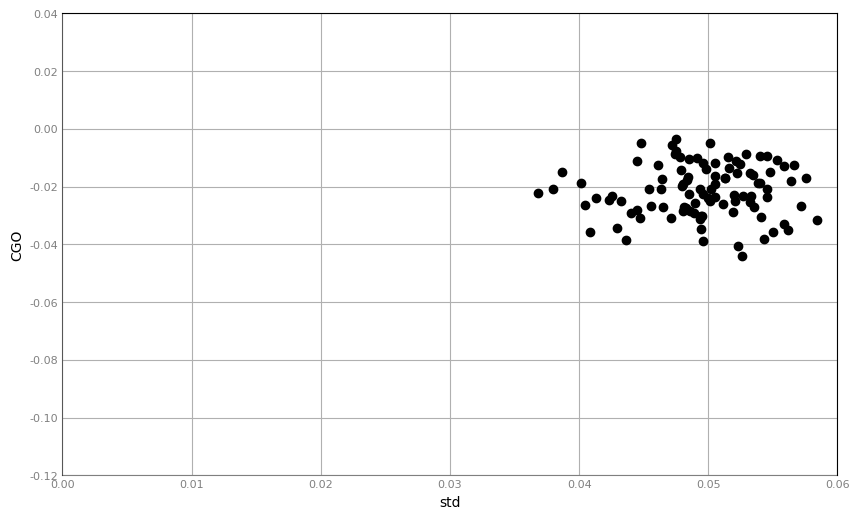

findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not foun

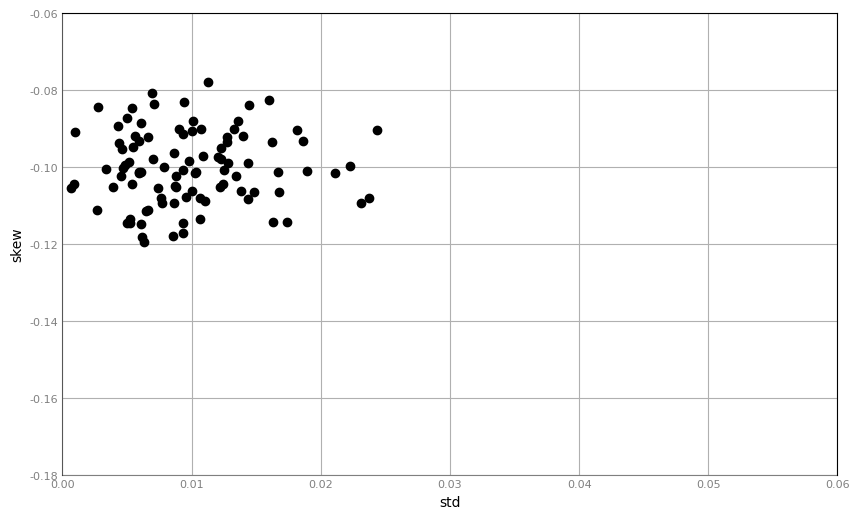

findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not foun

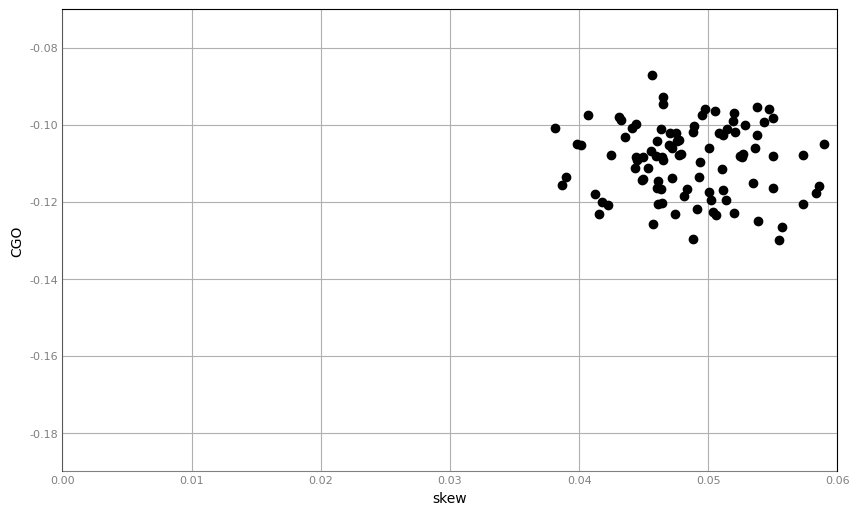

In [91]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['axes.unicode_minus']=False
def calculate_V(R, CGO,V):
    const = np.ones(len(R))
    X = np.column_stack((const, np.abs(R), CGO))
    model = sm.OLS(V, X).fit()
    V_pred = model.predict(X)
    return V_pred
df.skew()
mean = df.mean()
abs_dev = df.sub(mean).abs()
abs_dev.mul(1.4826).mean()
df.std()
import numpy as np
import matplotlib.pyplot as plt
figura = plt.figure(figsize=(10, 6))
x = np.random.normal(0.03, 0.005, 100)
y = np.random.normal(-0.04, 0.01, 100)
x = x + 0.02
y = y + 0.02
plt.scatter(x, y, color='black', zorder=2)
plt.tick_params(axis='both', which='both', length=0, width=0, labelsize=8, labelcolor='gray', pad=3)
plt.gca().spines['bottom'].set_facecolor('white')
plt.gca().spines['left'].set_facecolor('white')
plt.gca().spines['bottom'].set_alpha(0.5)
plt.gca().spines['left'].set_alpha(0.5)
plt.grid(True)
plt.xlim(0, 0.06)
plt.ylim(-0.12, 0.04)
plt.xlabel('std')
plt.ylabel('CGO')
plt.savefig('std_cgo.svg', format='svg', bbox_inches='tight', transparent=True, dpi=600)
figura = plt.figure(figsize=(10, 6))
x = np.random.normal(0.03, 0.005, 100)
y = np.random.normal(-0.04, 0.01, 100)
x = x - 0.02
y = y - 0.06
plt.scatter(x, y, color='black', zorder=2)
plt.tick_params(axis='both', which='both', length=0, width=0, labelsize=8, labelcolor='gray', pad=3)
plt.gca().spines['bottom'].set_facecolor('white')
plt.gca().spines['left'].set_facecolor('white')
plt.gca().spines['bottom'].set_alpha(0.5)
plt.gca().spines['left'].set_alpha(0.5)
plt.grid(True)
plt.xlim(0, 0.06)
plt.ylim(-0.18, -0.06)
plt.xlabel('std')
plt.ylabel('skew')
plt.savefig('std_skew.svg', format='svg', bbox_inches='tight', transparent=True, dpi=600)
figura = plt.figure(figsize=(10, 6))
x = np.random.normal(0.03, 0.005, 100)
y = np.random.normal(-0.04, 0.01, 100)
x = x + 0.02
y = y - 0.07
plt.scatter(x, y, color='black', zorder=2)
plt.tick_params(axis='both', which='both', length=0, width=0, labelsize=8, labelcolor='gray', pad=3)
plt.gca().spines['bottom'].set_facecolor('white')
plt.gca().spines['left'].set_facecolor('white')
plt.gca().spines['bottom'].set_alpha(0.5)
plt.gca().spines['left'].set_alpha(0.5)
plt.grid(True)
plt.xlim(0, 0.06)
plt.ylim(-0.19, -0.07)
plt.xlabel('skew')
plt.ylabel('CGO')
plt.savefig('skew_cgo.svg', format='svg', bbox_inches='tight', transparent=True, dpi=600)

In [ ]:
group=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10']
import math

def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0
alpha_d = Mreteq
alpha_m =Mrettmv
if sign(alpha_d[-1] - alpha_d[0]) == sign(alpha_m[-1] - alpha_m[0]) and math.isclose(abs(alpha_m[-1] - alpha_m[0]), 0.015 * abs(alpha_m[-1] + alpha_m[0]), rel_tol=1e-9):
    print("The condition is satisfied.")
else:
    print("The condition is not satisfied.")

In [ ]:
def calculate_std(R_i, v, S_i, zeta_i):
    numerator = v / (v - 2) * S_i + (2 * v**2) / ((v - 2)**2 * (v - 4)) * zeta_i**2
    std = np.sqrt(numerator)
    return std
import numpy as np
def calculate_skew(R_i, v, S_i, zeta_i):
    numerator = 2 * zeta_i * np.sqrt(v * (v - 4))
    denominator = np.sqrt(S_i) * ((2 * v * zeta_i**2 / S_i) + (v - 2) * (v - 4))**(3/2)
    skew = numerator / denominator * (3 * (v - 2) + (8 * v * zeta_i**2) / (S_i * (v - 6)))
    return skew
import numpy as np
from scipy.optimize import fsolve

def equations(vars, S_i, v):
    R_i, zeta_i = vars
    eq1 = np.sqrt((v / (v - 2) * S_i + (2 * v**2) / ((v - 2)**2 * (v - 4)) * zeta_i**2)) - 0.0413
    eq2 = (2 * zeta_i * np.sqrt(v * (v - 4))) / (np.sqrt(S_i * ((2 * v * zeta_i**2 / S_i) + (v - 2) * (v - 4)))**3) * (3 * (v - 2) + (8 * v * zeta_i**2) / (S_i * (v - 6))) - 1.477 * 1e-3 * R_i
    return [eq1, eq2]
    solution = fsolve(equations, [R_i_guess, zeta_i_guess], args=(S_i, v))
    R_i_solution, zeta_i_solution = solution
    return R_i_solution, zeta_i_solution

def calculate_alpha(l, R_100l, R_f, beta_100l, R_M):
    alpha = ((R_100l - (R_f + beta_100l * (R_M - R_f))) + 1) ** 4 - 1
    return alpha


In [16]:
def calculate_alpha(l, R_100l, R_f, beta_100l, R_M):
    alpha = ((R_100l - (R_f + beta_100l * (R_M - R_f))) + 1) ** 4 - 1
    return alpha
l1 = 1;l2 = 10;R_100l1 = 10.5;R_100l2 = 11.8;R_f = 2.5;
beta_100l1 = 0.8;beta_100l2 = 0.9;R_M = 7.5
alpha_d10 = calculate_alpha(l2, R_100l2, R_f, beta_100l2, R_M)
alpha_d1 = calculate_alpha(l1, R_100l1, R_f, beta_100l1, R_M)
alpha_m10 = calculate_alpha(l2, R_100l2, R_f, beta_100l2, R_M)
alpha_m1 = calculate_alpha(l1, R_100l1, R_f, beta_100l1, R_M)
if np.sign(alpha_d10 - alpha_d1) == np.sign(alpha_m10 - alpha_m1):
    if np.abs(alpha_m10 - alpha_m1) > 0.015:
        result = "Condition is satisfied"
    else:
        result = "Condition is not satisfied"
else:
    result = "Condition is not satisfied"
    

Condition is satisfied
